# Part 4b: Sample Count and Sample Rate

In [1]:
from aspectdeviceengine.enginecore import IdSmuService, IdSmuServiceRunner, IdSmuBoardModel
import plotly.graph_objects as go
import numpy as np
from aspectdeviceengine.enginecore import SmuCurrentRange
from plotly.subplots import make_subplots

This document is available as pdf and interactive jupyter notebook.
The introduction includes the following objectives:
- Understanding the sample count

In [2]:
srunner = IdSmuServiceRunner()

## Background

The sample rate of the internal ADC is 250k samples/s or 4 microseconds per sample.  
The API user can specify how many samples should be taken per measurement.  
The `sample_count` is the parameter with which the number of samples per measurement is defined, whereby the above-mentioned sample rate is used for sampling.
These samples are averaged by the hardware after the measurement before they are returned as a result. This improves the signal-to-noise ratio (SNR).  
This is the best performing solution to average samples with an exact time interval between 2 samples. The user can of course also record single measurements and average them in his application. However, this is less performant and the time interval between 2 samples is not exactly defined.  

This is only shown here using the Python properties as an example. There are similar parameters for the board and multiside methods.

In [65]:
ch1 = idSmu2.smu.channels["M1.S1.C1"]
ch2 = idSmu2.smu.channels["M1.S1.C3"]
ch1.enabled = True
ch2.enabled = True
ch1.voltage = 0
ch2.voltage = 0

The default sample count is 16. To be able to see the effect better, the sample count is set to 1.

In [81]:
ch1.sample_count = 1
ch2.sample_count = 1
ch1.current_range = SmuCurrentRange.Range_5uA
ch2.current_range = SmuCurrentRange.Range_5uA

20 measurements are carried out on the two channels and the results are saved in Arrays:

In [82]:
ch1_results = np.zeros(20)
ch2_results = np.zeros(20)
ch1_x = np.zeros(20)
for i in range(0,20):
    ch1_x[i] = i
    ch1_results[i] = ch1.current
    ch2_results[i] = ch2.current   

Helper function to generate the plots:

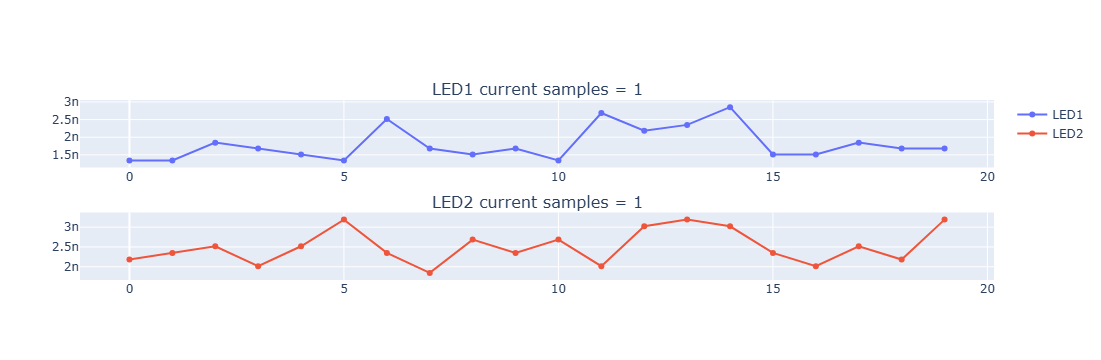

In [83]:
def create_fig(nsamples):  
    fig = make_subplots(rows=2, cols=1,  subplot_titles=(f"LED1 current samples = {nsamples}", f"LED2 current samples = {nsamples}"))
    fig.add_trace(go.Scatter(x=ch1_x, y=ch1_results,
                        mode='lines+markers+text',
                        name='LED1'),  row=1, col=1)
    fig.add_trace(go.Scatter(x=ch1_x, y=ch2_results,
                        mode='lines+markers+text',
                        name='LED2'),  row=2, col=1)
    fig.update_layout(height=600)
    return fig
fig = create_fig(1)
fig

As you can see, the curve is very noisy and fluctuates in amplitude over more than one nanoampere.
The maximum resolution in the 5uA current range is 170pA.  
To improve the SNR, the sample count is increased to 128: 
> Note : The sample rate can only be set to powers of 2

In [84]:
ch1.sample_count = 128
ch2.sample_count = 128

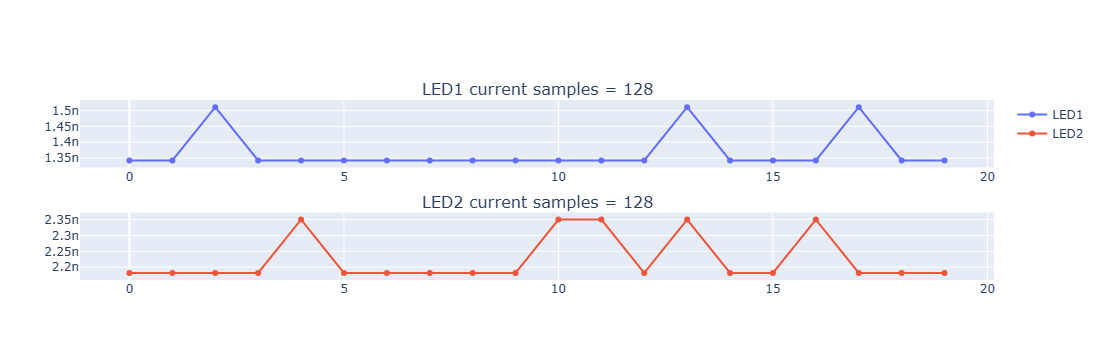

In [85]:
for i in range(0,20):
    ch1_x[i] = i
    ch1_results[i] = ch1.current
    ch2_results[i] = ch2.current   
fig = create_fig(128)
fig

Now you can see a clearly smoothed curve. The fluctuations correspond to the maximum resolution of 170pA.

In [19]:
srunner.shutdown()